> [Welcome to Colab](https://colab.research.google.com/), *a hosted `python` notebook environment, where code & documentation live side-by-side.*
>
> **Note:** if your notebook sections are expanded, please go to *`View > Collapse sections`* or press `Ctrl/⌘ + [`
---
<img src="https://www.actuarialsociety.org.za/wp-content/uploads/2022/10/ASSA-LOGO-20224.png"  width="420" height="80">

# **The Actuarial Data Science Toolkit** 
### *A Practical Introduction*

# **0. Table of contents** 
---

↖️ `click  task bar`

# **1. Introduction**

---



In recent years the rise of data intensive methods has seen terms like *Big Data*, *Data Science* and *Arficial Intelligence* (AI) enter public lexicon. The use of such methods in data-rich, mostly internet-based businesses has resulted in tools that may be applied more broadly and indeed data science tools and methods are used in broad domains. Actuaries have deep expertise with data, yet we have been slow to adapt to use newer data science type tools. 

>   ℹ️ *An actuarial view of Data Science may be found [here](https://actuaries.org.uk/learn/lifelong-learning/data-science-an-actuarial-viewpoint/) and an overview of AI in Actuarial Science may be found [here](https://www.actuarialsociety.org.za/wp-content/uploads/2018/10/2018-Richman-FIN.pdf).*

This practical tutorial is designed to *introduce* data science tools that may prove useful in actuarial workflows. No prior knowledge is assumed and concepts are outlined with provided **reusable code**. Links to more thorough learning materials for individual topics are also provided. The hope is that it will spark curiousity in members and that they will use such tools more regularly in their day-to-day work. 

>   ℹ️ *Typical actuarial work needs better data maturity, along with practical upskilling to take full advantage of advanced AI. As a profession of thought leaders we should help shape our industries' futures to take advantage of these rapidly evolving technologies.*
 

# **2. From Excel to `python`**  🐍

---


#### **2.0 Section learning objectives**

>The purpose of this section is to introduce a member, who is proficient in Excel, to basic `python` tools. This is intended for an absolute beginner and  afterwards the member should feel comfortable using `python` for common tasks they would normally perform in Excel.
>
>   * Basic system operation
>       * Introduce notebooks
>       * `wget` data 
>       * `os` functionality
>       * `pip install`
>       * `import` packages
>
>   * `pandas`
>       * Link to learning resoruces
>       * Note on `v2.0.0` 
>       * Summarise data
>       * Read `.xlsx` data into df
>       * Rename columns
>       * Drop `na`
>       * Drop duplicates `#TODO`
>       * Query with wildcards
>       * Filter 
>       * Conditional formatting
>   * `openpyxl` `#TODO`
>       * named ranges

#### 2.1 **We can't ignore Excel, for now...**

There is no denying that the majority of actuarial work is done in Excel (for now!). As such, learning to intergrate Excel as a tool in your data science workflow is essential for practical benefit. 


#### 2.2 **Why `python`?**

In the data science community there has been fierce debate over whether `python` or `R` was the better data science coding language. While both languages are capible, we have opted for `python` as it has become the defacto language used for modern AI tools. It is also worth mentioning that `julia`, a newer language is growing and there is already an [actuarial `julia` community](https://juliaactuary.org/).

A major advantage of Python is the popularity of notebooks, like this document. A notebook is a "living document" with live code and documentation displayed side-by-side. We have opted to use Colab as it provides free GPU access, needed for modern AI. We will need this GPU below!  

#### 2.3 **Getting data from an external source**
GitHub is a platform used to store code. In making this tutorial we created the Actuarial Society's GitHUb account. 

> ℹ️ *GitHub is a where open-source code is stored. It is a great place to colaborate and there are lots of free-to-use data science projects (repositories) to explore. If you don't have an account you can get one [here](https://github.com/).*

In [1]:
# clone the repository from the actuarialsociety's github 
# bash script (!)
!git clone https://github.com/actuarialsociety/dstoolkit.git

Cloning into 'dstoolkit'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 92 (delta 52), reused 29 (delta 18), pack-reused 0
Receiving objects: 100% (92/92), 1.47 MiB | 588.00 KiB/s, done.
Resolving deltas: 100% (52/52), done.


Let's check that our files are there

In [1]:
# Import os package to enable us to work with files
import os
print(f"Getting our current working directory{os.getcwd()} \n")
print(f"Listing what is in our directory \n {os.listdir()} \n") 

Getting our current working directory/Users/neelanpather/dev/dstoolkit 

Listing what is in our directory 
 ['generating_modelpoints.ipynb', 'dstoolkit', 'Actuarial_Data_Science_Toolkit_Intro.ipynb', 'README.md', '.gitignore', '.ipynb_checkpoints', '.git', 'model_point.xlsx', '.conda'] 



We can see the repository we just cloned `dstoolkit` is listed. 

In [2]:
# Examining our repo
os.listdir("./dstoolkit")

['generating_modelpoints.ipynb',
 'Actuarial_Data_Science_Toolkit_Intro.ipynb',
 'README.md',
 '.gitignore',
 '.git',
 'model_point.xlsx']

 ↖️ We could have also just used the task bar.

#### 2.4 **How to use `python` to work with Excel**

In order to extend the functionality of basic `python` we need to import **packages** into our notebook environment, into which all code is executed. Packages allow for an extension of basic python functionality.

The `python` pacakges `numpy` and `pandas` are literally two of the most used packages across any computing language. `numpy` provides broad mathematical functionality and `pandas` allows for data manipulation from multiple sources, including spreadsheets like Excel. 
In order to extend the functionality of basic `python` we need to import packages into our notebook environment, into which all code is executed. The `python` pacakges `numpy` and `pandas` are literally two of the most used packages across any computing language. `numpy` provides broad mathematical functionality and `pandas` allows for data manipulation from multiple sources, including spreadsheets like Excel. 

Typically packages are installed into our `python` environment using the `pip` command, however as we see below, due to their popularity, these packages are already installed in the Colab notebook environment. 

In [42]:
# bash script (!)
# we use -q (quiet) to suppress the output
%pip install numpy pandas Jinja2 sklearn openpyxl matplotlib seaborn scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


> ℹ️ `pandas` has very good documentation and a short introduction can be found [here](https://pandas.pydata.org/docs/user_guide/10min.html).

`pandas` a very  capable I/O API (Input/Output capabilities) and can read data from a [variety of sources](https://pandas.pydata.org/docs/user_guide/io.html), including common cloud platforms.

> ℹ️ *`pandas` version 2 (`pandas == 2.0`) was recently released. You can find the release notes [here](https://pandas.pydata.org/docs/dev/whatsnew/v2.0.0.html#), as well as a short video on what is new [here](https://www.youtube.com/watch?v=cSLPyRI_ZD8).*

In [4]:
# import necessary packages
import numpy as np
import pandas as pd

# path to data we just downloaded
# if you are interested in how modelpoints were created,
# check out the `generating_modelpoints.ipynb` file in the repo
DATA_XLS = "./dstoolkit/model_point.xlsx"

# ingesting our data into a dataframe (df)
df = pd.read_excel(DATA_XLS)


# now printing out some information about our data
print(f"\n Getting some basic info about our data... \n")
print(f"* size: {df.size} \n")
print(f"* shape:{df.shape} \n")

# now disaplying some information
# `display` is like `print` but renders pd df's better 
display(df.info())

print("\n Getting an idea about the ranges of each column... \n")
display(df.describe())

display(df.head(3))


 Getting some basic info about our data... 

* size: 110000 

* shape:(10000, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   policy_id      10000 non-null  int64         
 1   UUid           9000 non-null   object        
 2   Age At Entry   9000 non-null   float64       
 3   Sex            9000 non-null   object        
 4   Policy Term    9000 non-null   float64       
 5   Policy Count   9000 non-null   float64       
 6   Sum Assured    9000 non-null   float64       
 7   Issue date     9000 non-null   datetime64[ns]
 8   Payment freq   9000 non-null   float64       
 9   Payment_term   9000 non-null   float64       
 10  Premium        9000 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 859.5+ KB


None


 Getting an idea about the ranges of each column... 



,policy_id,Age At Entry,Policy Term,Policy Count,Sum Assured,Payment freq,Payment_term,Premium
count,10000.00000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,5000.50000,39.414778,14.953333,50.346444,505461.222222,4.976333,11.610000,83.460337
std,2886.89568,11.434117,4.129130,28.810723,285162.183081,4.955138,4.757377,85.390454
min,1.00000,20.000000,10.000000,0.000000,10000.000000,1.000000,5.000000,0.660920
25%,2500.75000,29.000000,10.000000,25.000000,260000.000000,1.000000,10.000000,27.604365
50%,5000.50000,39.000000,15.000000,50.000000,503000.000000,2.000000,10.000000,54.430256
75%,7500.25000,49.000000,20.000000,75.000000,753000.000000,12.000000,15.000000,107.983689
max,10000.00000,59.000000,20.000000,100.000000,1000000.000000,12.000000,20.000000,602.477954


,policy_id,UUid,Age At Entry,Sex,Policy Term,Policy Count,Sum Assured,Issue date,Payment freq,Payment_term,Premium
0,1,ee7602f8-c0ef-11ed-9035-0242ac1c000c,47.0,M,10.0,86.0,622000.0,2021-12-15,1.0,5.0,NaN
1,2,ee7604c4-c0ef-11ed-9035-0242ac1c000c,29.0,M,20.0,56.0,752000.0,2004-07-02,2.0,NaN,61.139589
2,3,ee76055a-c0ef-11ed-9035-0242ac1c000c,51.0,F,NaN,83.0,799000.0,2020-10-02,12.0,10.0,158.651775


We can already see from our `model_point.info()` command that there are `null` values, that we probably want to drop. In reality it probably worth checking if the data could be better sourced to have fewer `null` values.

In [5]:
print(f"\n We examine the number of null values in our data before dropping them... \n")
print(f"\n Number of null items: \n {df.isnull( ).sum()}")
print(f"\n Shape before dropping nulls: \n {df.shape}")
df = df.dropna()
print(f"\n Shape after dropping nulls: \n {df.shape}")

print(f"\n We probably also what to trim spaces in our column names,convert to lower case and replace spaces with _ to make it easier to work with\n")
new_columns = [str(col).strip().lower().replace(" ","_") for col in list(df.columns)]
print(new_columns)

# creating dict to rename df
rename_dict = dict()
for i in range(0,len(list(df.columns))):
  rename_dict.update({list(df.columns)[i]:new_columns[i]})

# renaming df
df = df.rename(columns=rename_dict)

# coverting df.sex to a Categorical variable
df.sex = pd.Categorical(df.sex)

# coverting df.issue to a datetime
df.issue_date =  pd.to_datetime(df.issue_date, format='%d/%m/%Y')




 We examine the number of null values in our data before dropping them... 


 Number of null items: 
 policy_id           0
UUid             1000
Age At Entry     1000
Sex              1000
Policy Term      1000
Policy Count     1000
Sum Assured      1000
Issue date       1000
Payment freq     1000
Payment_term     1000
Premium          1000
dtype: int64

 Shape before dropping nulls: 
 (10000, 11)

 Shape after dropping nulls: 
 (3444, 11)

 We probably also what to trim spaces in our column names,convert to lower case and replace spaces with _ to make it easier to work with

['policy_id', 'uuid', 'age_at_entry', 'sex', 'policy_term', 'policy_count', 'sum_assured', 'issue_date', 'payment_freq', 'payment_term', 'premium']


In [6]:
# Importantly this allows one to access columns easier when running queries
# Setting query wildcards
query_age = 55
query_sa = 100000

# Querying with wildcards
(df
 .query('age_at_entry > @query_age and sum_assured > @query_sa')\
 .head(3))

,policy_id,uuid,age_at_entry,sex,policy_term,policy_count,sum_assured,issue_date,payment_freq,payment_term,premium
19,20,ee760e38-c0ef-11ed-9035-0242ac1c000c,57.0,F,15.0,34.0,274000.0,2011-03-29,12.0,15.0,109.263119
65,66,ee76224c-c0ef-11ed-9035-0242ac1c000c,57.0,M,20.0,76.0,517000.0,2010-11-29,12.0,20.0,263.868782
164,165,ee764ccc-c0ef-11ed-9035-0242ac1c000c,58.0,F,10.0,25.0,995000.0,2022-10-24,2.0,10.0,332.185054


In [7]:
# We may wish to group by certrain columns and perform aggregations
(df
.groupby(['sex','policy_term'])\
.sum_assured\
.agg(['sum', 'mean','count']))

sum           mean  count
sex policy_term                                   
F   10.0         284661000.0  508323.214286    560
    15.0         265194000.0  489287.822878    542
    20.0         296627000.0  507922.945205    584
M   10.0         330525000.0  514836.448598    642
    15.0         274310000.0  518544.423440    529
    20.0         302914000.0  516037.478705    587

In [8]:
# We may also wish to perform conditional formatting on our dataframe

(df.
 sort_values('age_at_entry').head(5)[['age_at_entry', 'premium']]\
.style\
.background_gradient("Blues"))

,age_at_entry,premium
5724,20.000000,30.491230
4157,20.000000,36.409983
2357,20.000000,6.969911
3180,20.000000,40.155009
4969,20.000000,34.482472


#### 2.5 What about named ranges?

Let's say we had another workbook the cashflow run offs of all our policies under different shocks, `cashflow_shocks.xlsx`.

Let's say the data is saved as **named ranges** in our workbook as follows: 

* `base`: The base scenario

* `lapse50`: The stress scenario of 50% level increase in lapse rates

* `mort15`: The stress scenario of 15% level increase in mortality rates

Unfortunately `pandas` cannot handle named ranges in Excel. To do this we will use another package `openpyxl`.

In [30]:
import pandas as pd
import openpyxl

SHOCK_DATA = "./cashflow_shocks.xlsx"

# reading in our data with openpyxl
df_s = openpyxl.load_workbook(SHOCK_DATA) 

# getting named rangs in our workbook
list(df_s.defined_names.keys())

['base', 'lapse15', 'mort15']

> ℹ️ *[`xlwings`](https://www.xlwings.org/) is a very good package for replacing VBA with python*

# **3. Make it visual 👀** 
---


#### **3.0 Section learning objectives** 

>The purpose of this section is to build upon the previous section; having ingested data, simple visualisation techniques are explored
>  * Slice list
>  * Basic plotting by looping with `matplotlib.pyplot` & `seaborn`
>  * Reduce distinct x-axis values for better visualisation
>  * Write & use a basic python function for repeated code
>  * Docstrings from own function and from packages
  
After looking at all available columns, we decide we wish to drop `'model_point'` & `'uuid'`, and thus only focus on columns with index 2 and above.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#only focusing on columns with index 2 and above.
cols_to_plot = list(df.columns)[2:]
print(cols_to_plot)

['age_at_entry', 'sex', 'policy_term', 'policy_count', 'sum_assured', 'issue_date', 'payment_freq', 'payment_term', 'premium']


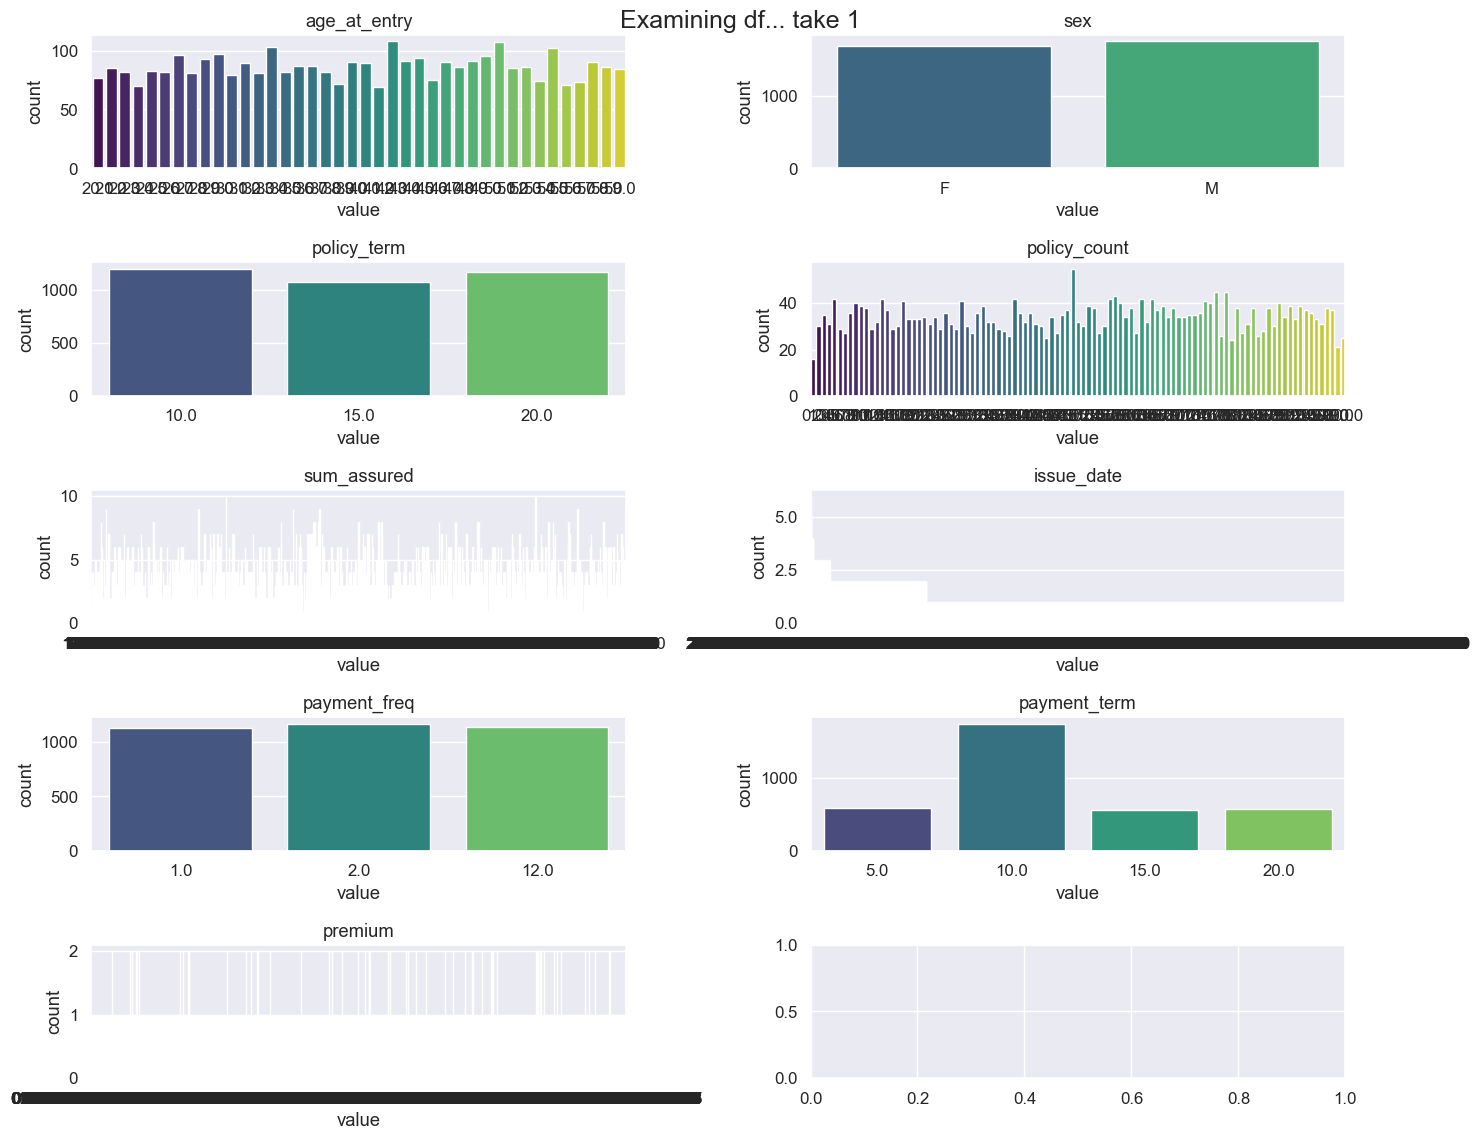

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a Seaborn style="white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set(style="darkgrid", font_scale=1.1)

# Define subplot grid
fig, axs = plt.subplots(nrows=int(len(cols_to_plot) / 2) + 1, ncols=2, figsize=(15, 12))

# Set figure title
fig.suptitle("Examining df... take 1", fontsize=18, y=0.95)

# Loop through cols_to_plot
for col, ax in zip(cols_to_plot, axs.ravel()):
    # Getting an idea of the distribution by counting values
    counts = df[col].value_counts().reset_index()
    
    # Use Seaborn barplot with custom colors
    sns.barplot(data=counts, x='index', y=col, ax=ax, palette='viridis')

    # Chart formatting
    # Chart title
    ax.set_title(col)
    # Chart y label
    ax.set_ylabel("count")
    # Chart x label
    ax.set_xlabel("value")

plt.tight_layout()
plt.show()


We can see that for `issue_date, sum_assured, premium` there are too many values we are counting by, and thus we struggle to see what is happening. 

We will create new variables that aggregate these columns for fewer values and replace those columns in our `cols_to_plot` list. 


In [37]:
df['issue_date_month'] = df['issue_date'].dt.to_period('M')

print(f"For `issue_date_month`, we previously had {df['issue_date'].nunique() } unique values; now we have {df['issue_date_month'].nunique() } ")

For `issue_date_month`, we previously had 2735 unique values; now we have 276 


In [38]:
# using list comprehension to create bins
bins = [(df['sum_assured'].max())*(i/10) for i in range(1,11)]
df['sum_assured_binned'] = pd.cut(df['sum_assured'], bins)

print(f"For `sum_assured`, we previously had {df['sum_assured'].nunique() } unique values; now we have {df['sum_assured_binned'].nunique() } ")

For `sum_assured`, we previously had 952 unique values; now we have 9 


In [39]:
# using list comprehension to create bins
bins = [(df['premium'].max())*(i/10) for i in range(1,11)]
df['premium_binned'] = pd.cut(df['premium'], bins)

print(f"For `premium`, we previously had {df['premium'].nunique() } unique values; now we have {df['premium_binned'].nunique() } ")

For `premium`, we previously had 3389 unique values; now we have 9 


In [59]:
# we make a dictionary to change items in our cols_to_plot list
rename_dict = dict()

for i in cols_to_plot:
  rename_dict.update({i:i})
rename_dict["issue_month"] = "issue_month_month"
rename_dict["sum_assured"] = "sum_assured_binned"
rename_dict["premium"] = "premium_binned"

# now we map rename_dict to cols_to_plot 
cols_to_plot = [*map(rename_dict.get, cols_to_plot)]

cols_to_plot.remove('policy_count')

cols_to_plot

['age_at_entry',
 'sex',
 'policy_term',
 'sum_assured_binned',
 'issue_date',
 'payment_freq',
 'payment_term',
 'premium_binned']

Now that we have updated `cols_to_plot` we will turn our plot commands into a function. Note the description (known as a Doc String) which outlines the detail of inputs and outputs. This will appear if you say `help(function_name)`

Notebooks are messy and often used for ad-hoc investigations. In a production environment we would want to turn all our commands into neat functions. 

In [74]:
from typing import List

def plot_distribution(df: pd.DataFrame, cols_to_plot: List[str], style: str = 'whitegrid', palette: str = 'viridis'):
    """
    Plot the distribution of the specified columns in a DataFrame using Seaborn's barplot.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to plot
    cols_to_plot (list): A list of column names to plot
    style (str): The Seaborn style to use for the plot. Options: "darkgrid", "whitegrid", "dark", "white", "ticks"
    palette (str): The color palette to use for the plot. Options: "deep", "muted", "pastel", "bright", "dark", "colorblind", "viridis", "inferno", "plasma", "magma", "cividis"

    Returns:
    None
    """

    # Set a Seaborn style="white", "dark", "whitegrid", "darkgrid", "ticks"
    sns.set(style="darkgrid", font_scale=0.7)

    # Define subplot grid
    fig, axs = plt.subplots(nrows=int(len(cols_to_plot) / 2) + 1, ncols=2, figsize=(15, 12))

    # Set figure title
    fig.suptitle("Examining data distribution", fontsize=18, y=1)

    # Loop through cols_to_plot
    for col, ax in zip(cols_to_plot, axs.ravel()):
        # Getting an idea of the distribution by counting values
        counts = df[col].value_counts().reset_index()
        
        # Use Seaborn barplot with custom colors
        sns.barplot(data=counts, x='index', y=col, ax=ax, palette='viridis')

        # Chart formatting
        # Chart title
        ax.set_title(col)
        # Chart y label
        ax.set_ylabel("count", fontsize = 10)
        # Chart x label
        ax.set_xlabel("value", fontsize = 10)

    plt.tight_layout()
    plt.show()


Examining our doc string

In [48]:
help(plot_distribution)

Help on function plot_distribution in module __main__:

plot_distribution(df: pandas.core.frame.DataFrame, cols_to_plot: List[str], style: str = 'whitegrid', palette: str = 'viridis')
    Plot the distribution of the specified columns in a DataFrame using Seaborn's barplot.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to plot
    cols_to_plot (list): A list of column names to plot
    style (str): The Seaborn style to use for the plot. Options: "darkgrid", "whitegrid", "dark", "white", "ticks"
    palette (str): The color palette to use for the plot. Options: "deep", "muted", "pastel", "bright", "dark", "colorblind", "viridis", "inferno", "plasma", "magma", "cividis"
    
    Returns:
    None



Importantly, this will provide in-context help for any function importanted from a package. 

In [49]:
help(pd.Categorical)

Help on class Categorical in module pandas.core.arrays.categorical:

class Categorical(pandas.core.arrays._mixins.NDArrayBackedExtensionArray, pandas.core.base.PandasObject, pandas.core.strings.object_array.ObjectStringArrayMixin)
 |  Categorical(values, categories=None, ordered=None, dtype: 'Dtype | None' = None, fastpath: 'bool' = False, copy: 'bool' = True) -> 'None'
 |  
 |  Represent a categorical variable in classic R / S-plus fashion.
 |  
 |  `Categoricals` can only take on only a limited, and usually fixed, number
 |  of possible values (`categories`). In contrast to statistical categorical
 |  variables, a `Categorical` might have an order, but numerical operations
 |  (additions, divisions, ...) are not possible.
 |  
 |  All values of the `Categorical` are either in `categories` or `np.nan`.
 |  Assigning values outside of `categories` will raise a `ValueError`. Order
 |  is defined by the order of the `categories`, not lexical order of the
 |  values.
 |  
 |  Parameters
 

Now running our function

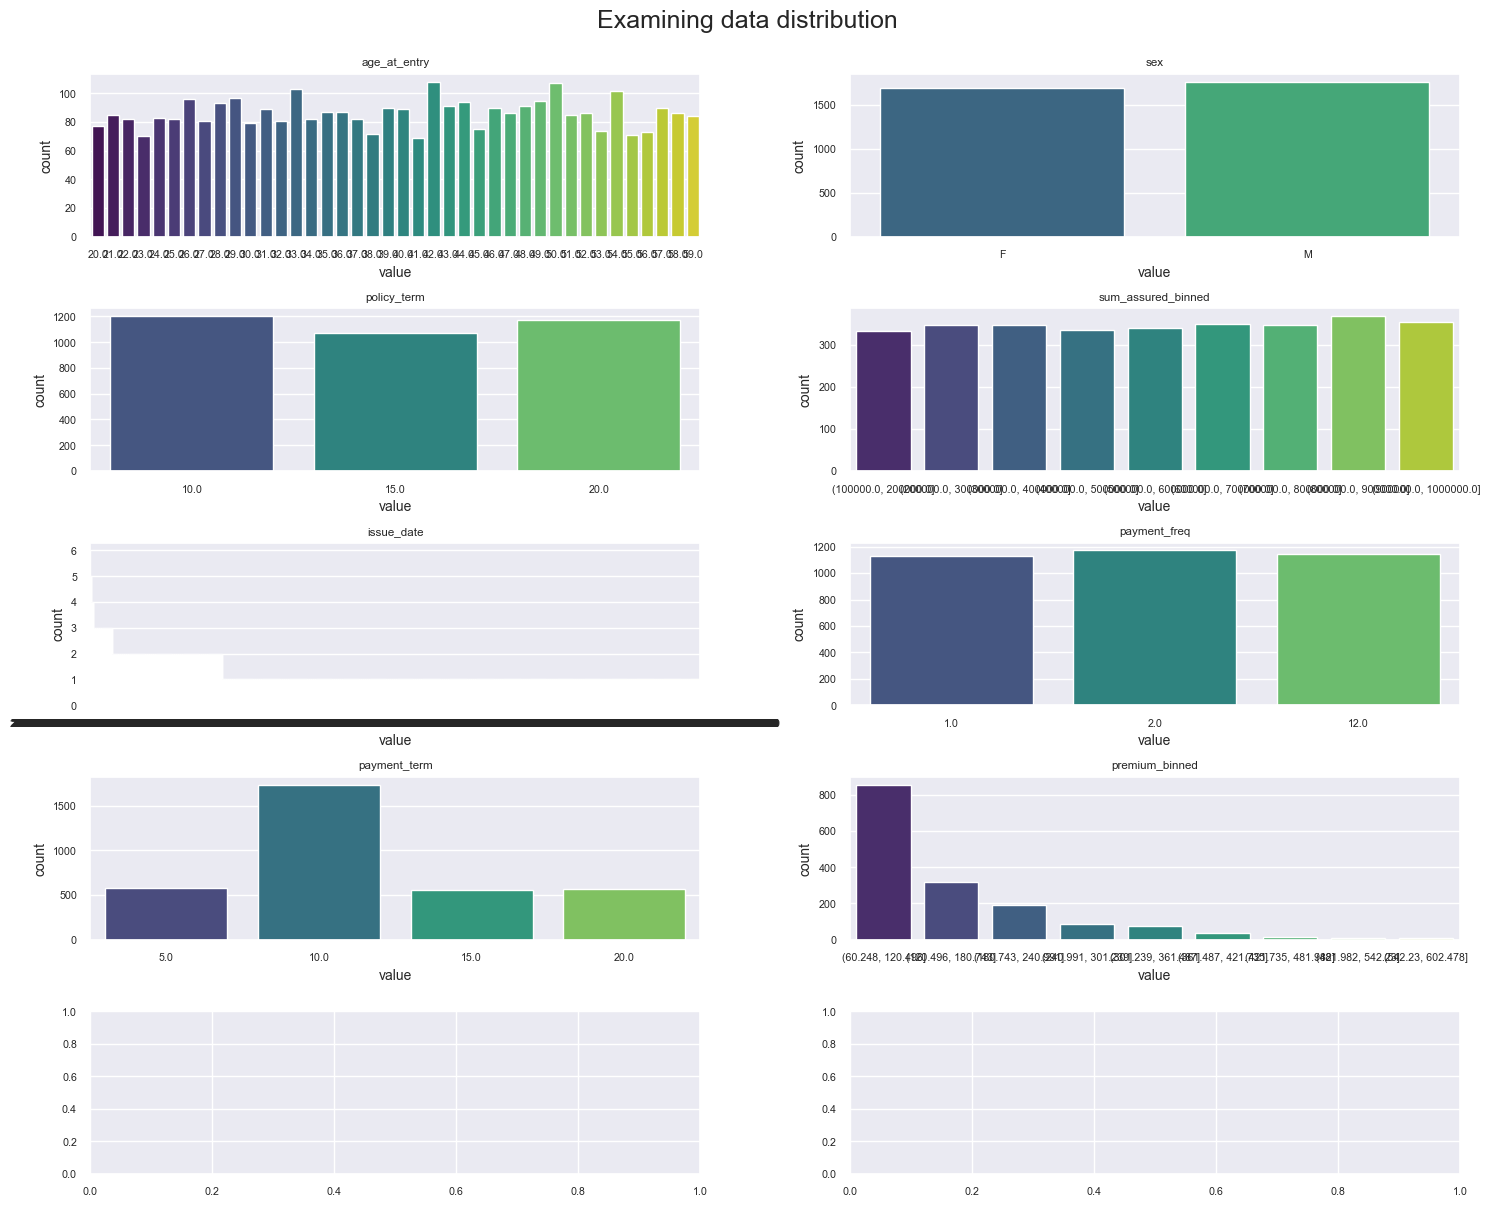

In [75]:
# Executing our function
plot_distribution(df, cols_to_plot)

# **4. A taste of cutting edge AI**  🦾🤖
---


#### 4.0 **Section learning objectives** 
>This section tries to bring some basic NLP (natural language processing) processing from `huggingface` into our workflow. 
* Brief introduction to `huggingface`
* Live demo of whisper
* Sentiment analysis of free-text

Within AI, in the last few years, language models have improved dramatically. This is due to a sequence based model called the [Transformer](https://www.youtube.com/watch?v=SZorAJ4I-sA). If you have heard of *Chat GPT*, the "T" in "GPT" is for Transformer!

[`huggingface`](https://huggingface.co/) 🤗, rose to populatity from their `transformers` package. However, since their inception they have built a cutting-edge community, with lots of open-source models that are shared and freely available. [Huggingface spaces](https://huggingface.co/?recent=update-space) allows one to explore and run these models in a browser. Importantly, there are lots of [educational materials](https://huggingface.co/course/) that one can use to upskill.



In [80]:
# bash script (!)
# installing packages
%pip install torch torchaudio transformers ipywebrtc librosa -q

Note: you may need to restart the kernel to use updated packages.


We will use Open AI's [Whisper](https://huggingface.co/openai/whisper-base.en), a high capable automatic speech recongition model.

In [81]:
# importing necessary packages
import librosa # for audio processing
import torch # for AI
import torchaudio # for AI audio processing
from transformers import WhisperTokenizer, pipeline # for tokenizing inputs
from ipywebrtc import AudioRecorder, CameraStream # for recording audio

from IPython.display import Audio # for playing audio

# load pre-trained model and tokenizer from huggingface hub\
# we convert inputs to tokens (small chunks), so it can be processes by the model
tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="English", task="transcribe")

# as mentioned, modern AI requires a Graphic Processing Unit (GPU)
# we set the device we will run on based on whether a GPU is available
# cuda is a software layer, allowing us to control the GPU
device = "cuda:0" if torch.cuda.is_available() else "cpu"

pipe = pipeline(
  "automatic-speech-recognition",
  model="openai/whisper-base.en",
  chunk_length_s=1,
  device=device,
)

In [ ]:
camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
from google.colab import output
output.enable_custom_widget_manager()
recorder

In [ ]:
# record phrase
with open('recording.webm', 'wb') as f:
    f.write(recorder.audio.value)
!ffmpeg -i recording.webm -ac 1 -f wav recording.wav -y -hide_banner -loglevel panic
sig, sr = torchaudio.load("recording.wav")
print(sig.shape)
Audio(data=sig, rate=sr

In [ ]:
#load audio file we just recorded
speech, rate = librosa.load("recording.wav",sr=16000)

`#TODO`
* create second data source of *Underwriter text comments*, where only some `uuid` values match `model_point` so that `merge` is needed to extract relevant items called `underwrite.csv`
* Perform Sentiment analysis with appopriate `huggingface` model
* Give discount to policies with positive underwriter sentiment

# **5. Resources**  📓
---


* VSCode is a popular Interactive Development Environment (IDE). It makes working with code **much** easier. In addition, their [training material](https://code.visualstudio.com/docs/introvideos/basics) is a great place to learn practical development skills.

* [Kaggle](https://www.kaggle.com/) is online community of data scientists and machine learning practitioners. They provide free access to GPUs and their forums are particularly good for finding solutions to data science code related problems.

* [Swiss Association of Actuaries Data Science initiative](https://www.actuarialdatascience.org/), seems to be the most mature data science effort by any acturaial society.

* [A curated list of free and open source actuarial software](https://github.com/genedan/actuarial-foss)

* [fast.ai](https://www.fast.ai/), a course and python `package` for accessible deep learning.

* [Distil](https://distill.pub/), interactive articles about machine learning & AI.









![Alt Text](https://media.tenor.com/oFO9mCbbj98AAAAC/rocket-lift-off.gif)